In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
## Load the data
df = pd.read_csv('dc_marvel_movie_performance clean.csv')

In [3]:
X = df[['Box office gross Worldwide', 'Budget', 'MCU', 'Minutes', 'Franchise', 'Gross to Budget', 'rotten Tomatoes Critic Score', 'male/female-led', 'Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget']]
y = df['Break Even']

In [6]:
numerical_features = ['Box office gross Worldwide', 'Budget', 'Minutes', 'Gross to Budget', 'rotten Tomatoes Critic Score', 'Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

C:\Windows\Temp\ipykernel_42004\1744811953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [7]:
categorical_features = ['MCU', 'Franchise', 'male/female-led']
label_encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

C:\Windows\Temp\ipykernel_42004\3291474187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
C:\Windows\Temp\ipykernel_42004\3291474187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoder.fit_transform(X[feature])
C:\Windows\Temp\ipykernel_42004\3291474187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9565217391304348
Precision: 1.0
Recall: 0.9285714285714286
F1 Score: 0.9629629629629629


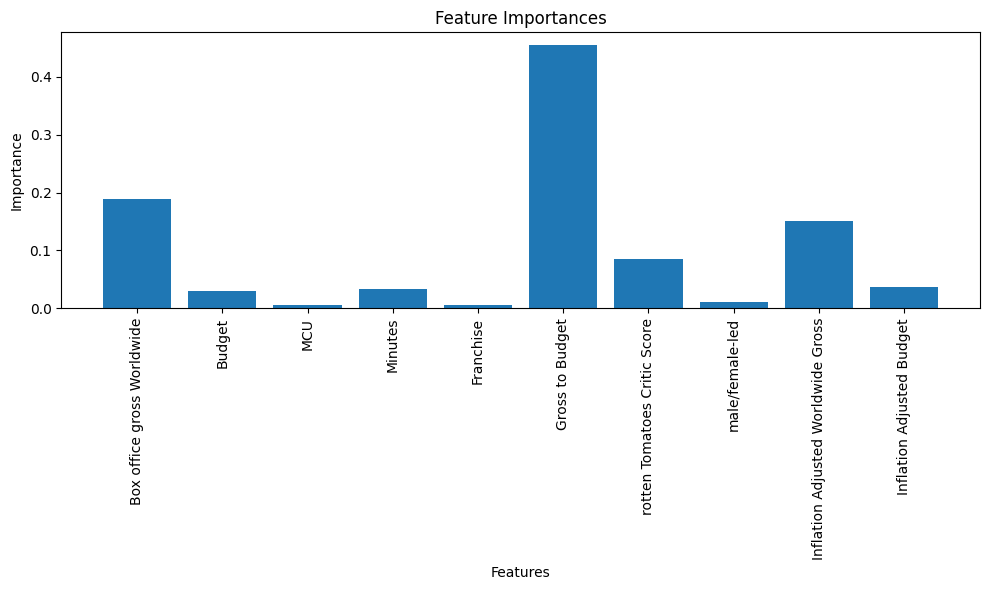

In [14]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(importances)), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(figsize=(10, 6))
plot_partial_dependence(rf, X, ['Minutes', 'rotten Tomatoes Critic Score'], ax=ax)
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\__init__.py)

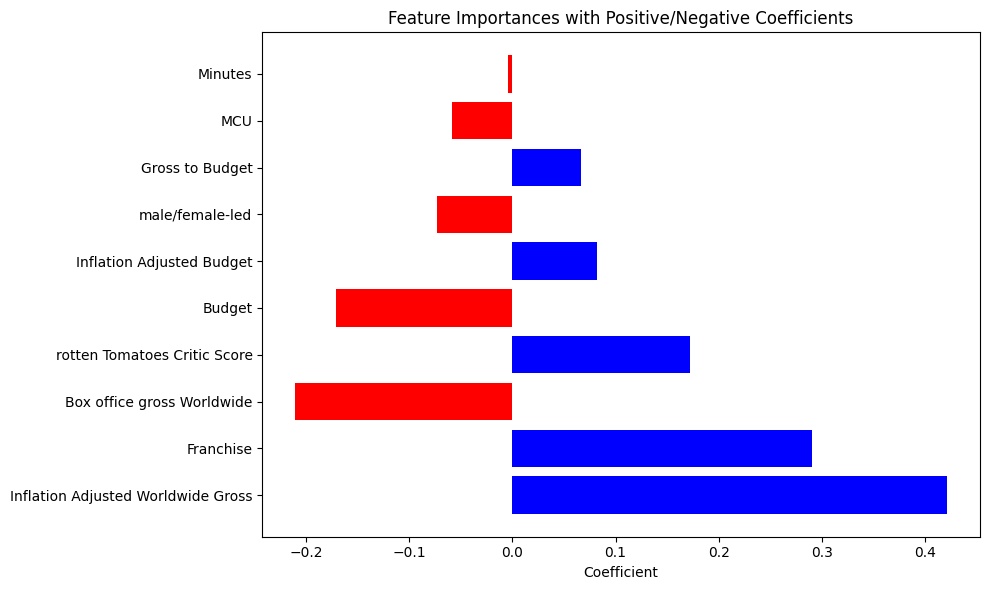

In [19]:
importances = rf.feature_importances_
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming you have X_train and y_train from your original dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

coefficients = lr.coef_

import pandas as pd

data = {'Feature': X.columns,
        'Importance': importances,
        'Coefficient': coefficients}
df_importance = pd.DataFrame(data)

df_importance['AbsCoefficient'] = abs(df_importance['Coefficient'])
df_importance = df_importance.sort_values(by='AbsCoefficient', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(df_importance)), df_importance['Coefficient'], align='center', 
         color=np.where(df_importance['Coefficient'] < 0, 'red', 'blue'))
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Coefficient')
plt.title('Feature Importances with Positive/Negative Coefficients')
plt.tight_layout()
plt.show()

In [21]:
import shap

# Assuming you have already trained the Random Forest model (rf) and have the test data (X_test)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Assuming you have a binary classification problem
if len(shap_values) == 2:
    # For binary classification, we usually take the SHAP values of the positive class (class 1)
    shap_values = shap_values[1]

# Create a DataFrame with the SHAP values and feature names
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Create a summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X_test.columns)

c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Must pass 2-d input. shape=(23, 10, 2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9565217391304348
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier instance
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


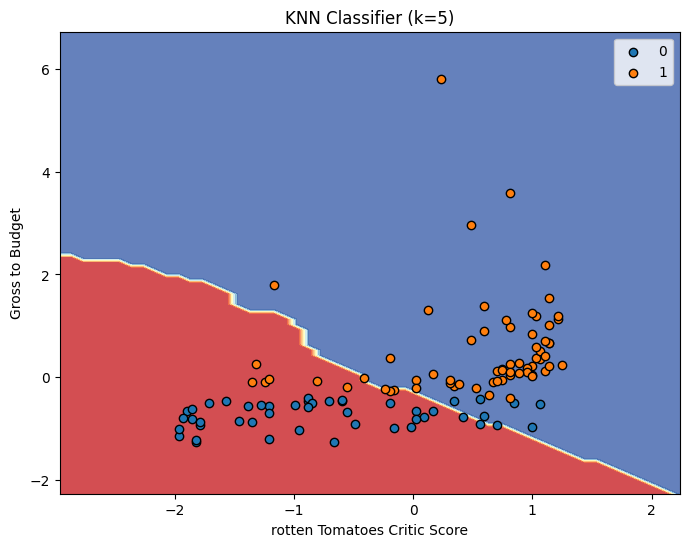

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization
feature1 = 'rotten Tomatoes Critic Score'
feature2 = 'Gross to Budget'

# Get the indices of the selected features
feature1_index = X.columns.get_loc(feature1)
feature2_index = X.columns.get_loc(feature2)

# Create a meshgrid of points for the selected features
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a 2D array with the selected features for prediction
X_pred = np.zeros((xx.ravel().shape[0], X.shape[1]))
X_pred[:, feature1_index] = xx.ravel()
X_pred[:, feature2_index] = yy.ravel()

# Predict the class for each point in the meshgrid using the scaled features
Z = knn.predict(scaler.transform(X_pred))
Z = Z.reshape(xx.shape)

# Create a plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
for class_label in np.unique(y):
    plt.scatter(X.loc[y == class_label, feature1], X.loc[y == class_label, feature2],
                label=class_label, edgecolor='black')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN Classifier (k={k})')
plt.legend()
plt.show()

c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


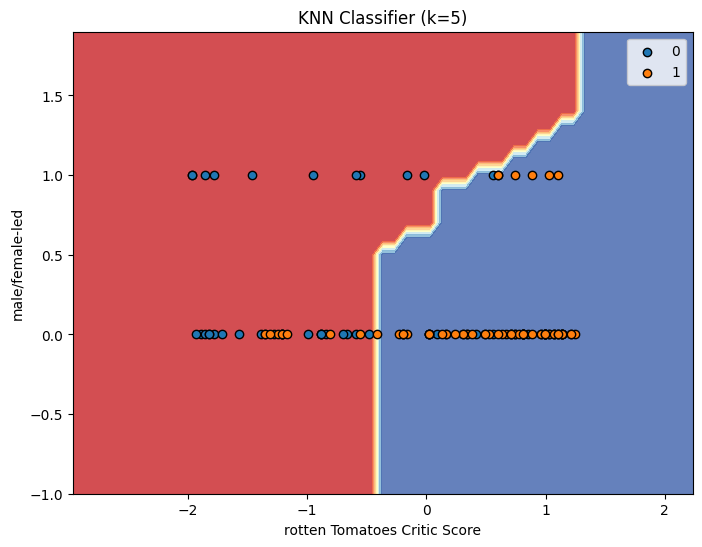

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization
feature1 = 'rotten Tomatoes Critic Score'
feature2 = 'male/female-led'

# Get the indices of the selected features
feature1_index = X.columns.get_loc(feature1)
feature2_index = X.columns.get_loc(feature2)

# Create a meshgrid of points for the selected features
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a 2D array with the selected features for prediction
X_pred = np.zeros((xx.ravel().shape[0], X.shape[1]))
X_pred[:, feature1_index] = xx.ravel()
X_pred[:, feature2_index] = yy.ravel()

# Predict the class for each point in the meshgrid using the scaled features
Z = knn.predict(scaler.transform(X_pred))
Z = Z.reshape(xx.shape)

# Create a plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
for class_label in np.unique(y):
    plt.scatter(X.loc[y == class_label, feature1], X.loc[y == class_label, feature2],
                label=class_label, edgecolor='black')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN Classifier (k={k})')
plt.legend()
plt.show()

c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


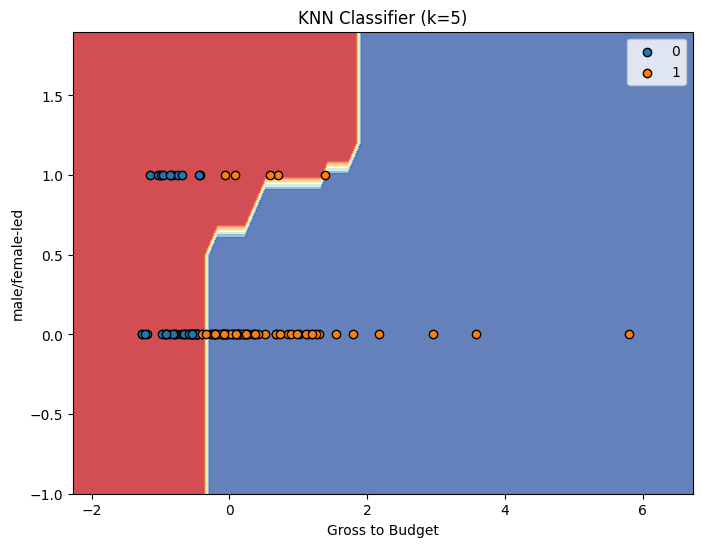

In [39]:

import matplotlib.pyplot as plt
import numpy as np

# Select two features for visualization
feature1 = 'Gross to Budget'
feature2 = 'male/female-led'

# Get the indices of the selected features
feature1_index = X.columns.get_loc(feature1)
feature2_index = X.columns.get_loc(feature2)

# Create a meshgrid of points for the selected features
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a 2D array with the selected features for prediction
X_pred = np.zeros((xx.ravel().shape[0], X.shape[1]))
X_pred[:, feature1_index] = xx.ravel()
X_pred[:, feature2_index] = yy.ravel()

# Predict the class for each point in the meshgrid using the scaled features
Z = knn.predict(scaler.transform(X_pred))
Z = Z.reshape(xx.shape)

# Create a plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
for class_label in np.unique(y):
    plt.scatter(X.loc[y == class_label, feature1], X.loc[y == class_label, feature2],
                label=class_label, edgecolor='black')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN Classifier (k={k})')
plt.legend()
plt.show()

c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\anast\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


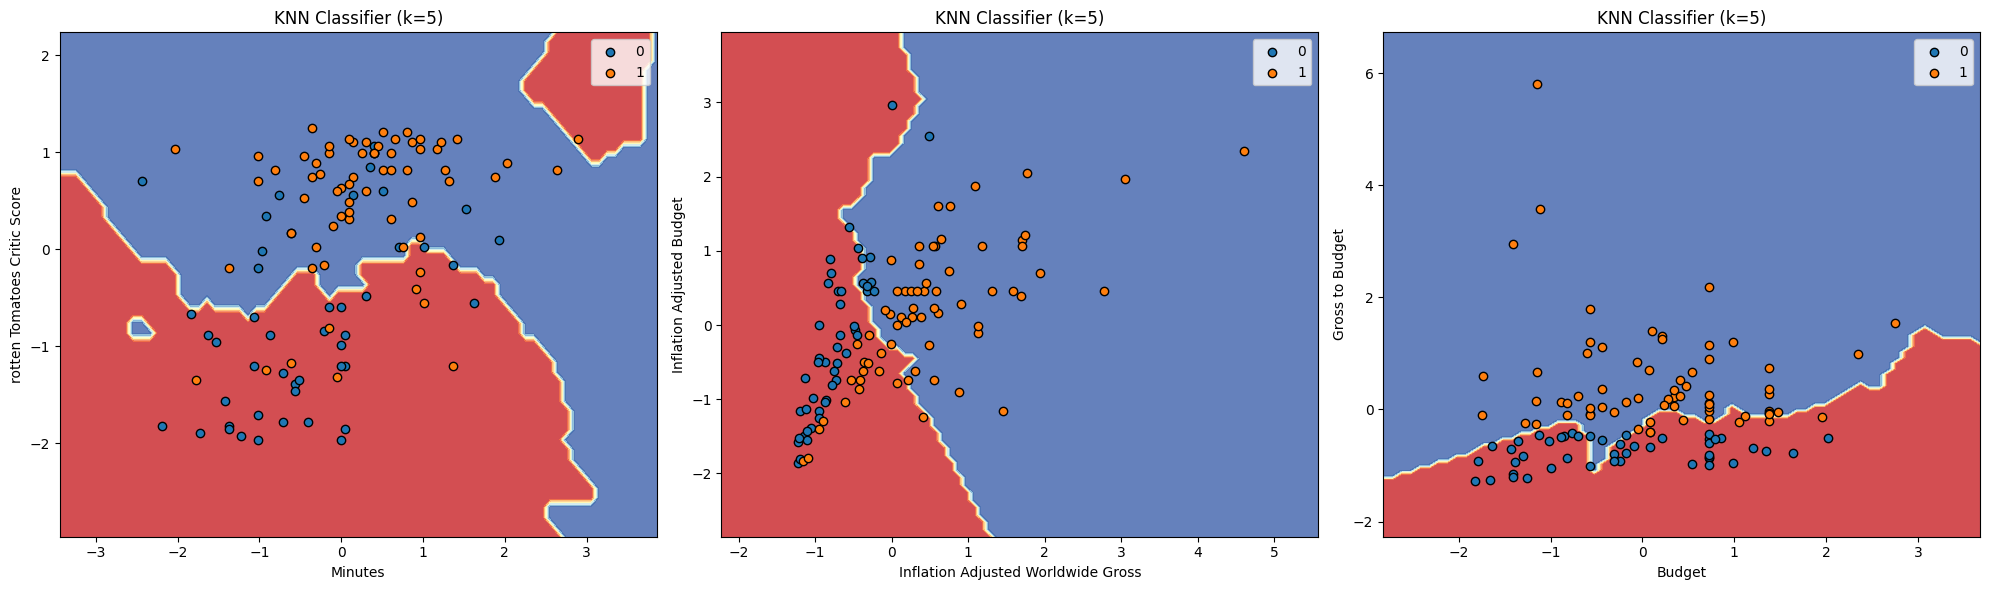

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Select multiple feature combinations for visualization
feature_combinations = [
    ('Minutes', 'rotten Tomatoes Critic Score'),
    ('Inflation Adjusted Worldwide Gross', 'Inflation Adjusted Budget'),
    ('Budget', 'Gross to Budget')
]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(feature_combinations), figsize=(20, 6))

for i, (feature1, feature2) in enumerate(feature_combinations):
    # Get the indices of the selected features
    feature1_index = X.columns.get_loc(feature1)
    feature2_index = X.columns.get_loc(feature2)

    # Create a meshgrid of points for the selected features
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Create a 2D array with the selected features for prediction
    X_pred = np.zeros((xx.ravel().shape[0], X.shape[1]))
    X_pred[:, feature1_index] = xx.ravel()
    X_pred[:, feature2_index] = yy.ravel()

    # Predict the class for each point in the meshgrid using the scaled features
    Z = knn.predict(scaler.transform(X_pred))
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and training points in the current subplot
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    for class_label in np.unique(y):
        ax.scatter(X.loc[y == class_label, feature1], X.loc[y == class_label, feature2],
                   label=class_label, edgecolor='black')

    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'KNN Classifier (k={k})')
    ax.legend()

plt.tight_layout()
plt.show()